In [21]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [22]:
df1=pd.read_excel("FiqureWHR2023.xls")
df2=pd.read_excel("TableWHR2023.xls",index_col=0)

In [23]:
df1.sample(5)

,Country name,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
121,Togo,4.1374,0.077148,4.288611,3.986189,7.673266,0.595356,57.448982,0.657430,0.024008,0.739809,1.777825,0.769852,0.641647,0.161267,0.366999,0.149313,0.135575,1.912698
120,Egypt,4.1705,0.059293,4.286714,4.054286,9.366826,0.726099,63.503036,0.732426,-0.182906,0.580246,1.777825,1.377242,0.971908,0.326220,0.466798,0.038294,0.249865,0.740198
131,Botswana,3.4353,0.136146,3.702147,3.168453,9.629346,0.753311,54.724998,0.742249,-0.214621,0.830392,1.777825,1.471394,1.040647,0.087047,0.479869,0.021277,0.070694,0.264347
65,Paraguay,5.7378,0.057503,5.850507,5.625093,9.509723,0.906064,65.899872,0.890843,0.020743,0.842590,1.777825,1.428492,1.426505,0.391525,0.677608,0.147561,0.061956,1.604119
26,Taiwan Province of China,6.5354,0.046871,6.627268,6.443532,10.797460,0.884425,69.599998,0.803921,-0.128958,0.680982,1.777825,1.890335,1.371842,0.492341,0.561938,0.067239,0.177711,1.974016


In [24]:
df2.sample(5)

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
Country name,,,,,,,,,,
Israel,2016,7.159011,10.551932,0.889661,71.949997,0.772297,0.149285,0.804057,0.601827,0.263090
Togo,2016,3.878578,7.569279,0.509441,54.700001,0.730287,-0.027282,0.815044,0.610478,0.482886
Iceland,2008,6.888284,10.878036,0.977430,71.199997,0.885196,0.266204,0.708049,0.851445,0.153068
South Africa,2014,4.828456,9.546331,0.881152,53.200001,0.794031,-0.126051,0.820258,0.729685,0.243358
Canada,2019,7.109076,10.803070,0.925304,71.300003,0.911526,0.107074,0.436434,0.780722,0.284834


In [25]:
df2_grouped=df2.groupby([df2.index, "year"])["Life Ladder"].mean()
df2_grouped = df2_grouped.reset_index()
indexes = df2_grouped['Country name'].unique()
df2_grouped.sample(5)

,Country name,year,Life Ladder
1364,Nepal,2007,4.748284
1273,Mexico,2018,6.549579
140,Bangladesh,2014,4.635565
1115,Lebanon,2020,2.633753
788,Honduras,2017,6.019986


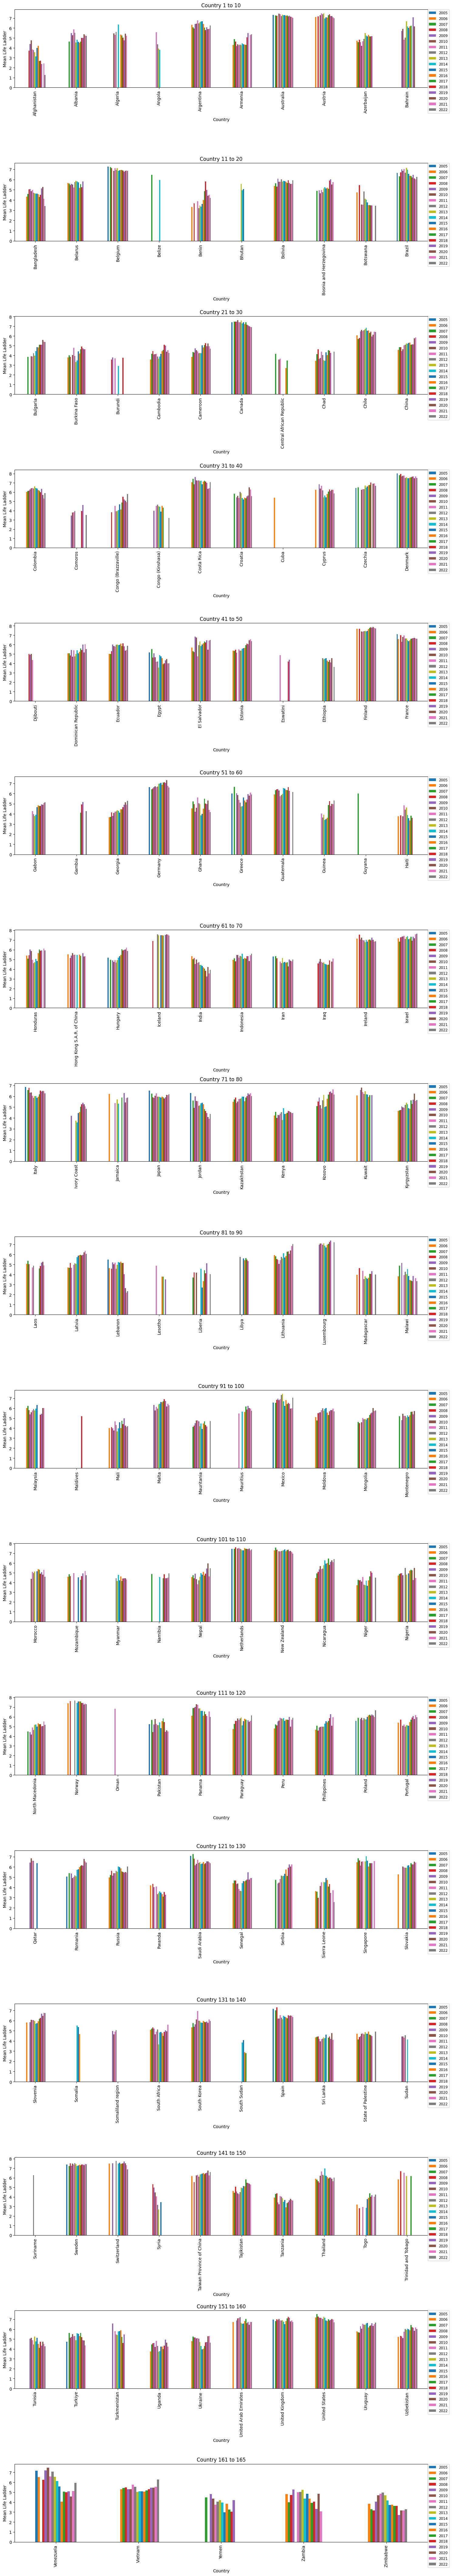

In [26]:
per_plot=10
num_plots = int(np.ceil(len(indexes) / per_plot))

fig, axes = plt.subplots(num_plots, 1, figsize=(15, 5*num_plots))

for i, ax in enumerate(axes):
    selected_indexes = indexes[i*per_plot:(i+1)*per_plot]

    df_selected = df2_grouped[df2_grouped['Country name'].isin(selected_indexes)]

    df_selected.groupby(['Country name', 'year'])['Life Ladder'].mean().unstack().plot(kind='bar', ax=ax)
    
    ax.set_title(f'Country {i*per_plot+1} to {min((i+1)*per_plot, len(indexes))}')

    ax.set_xlabel('Country')

    ax.set_ylabel('Mean Life Ladder')
    ax.legend(fontsize='small', bbox_to_anchor=( 1 , 1 ), loc='upper left',ncol=1, borderaxespad=0.)

plt.tight_layout()
plt.show()

In [27]:
df1_new = df1[["Ladder score", "Logged GDP per capita", 
               "Social support", "Healthy life expectancy",
               "Freedom to make life choices", "Generosity", 
               "Perceptions of corruption"]]
df1_new.sample(5)

,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
97,4.9409,9.098433,0.718453,63.414734,0.645771,-0.005400,0.876264
64,5.7633,9.286939,0.821143,65.502419,0.938641,-0.003643,0.758844
60,5.8402,9.372422,0.932827,60.499931,0.701163,0.190461,0.848722
36,6.2999,10.660866,0.922678,71.600037,0.885638,0.119315,0.728866
8,7.2279,11.659949,0.878501,71.675003,0.914938,0.023950,0.344978


<Axes: >

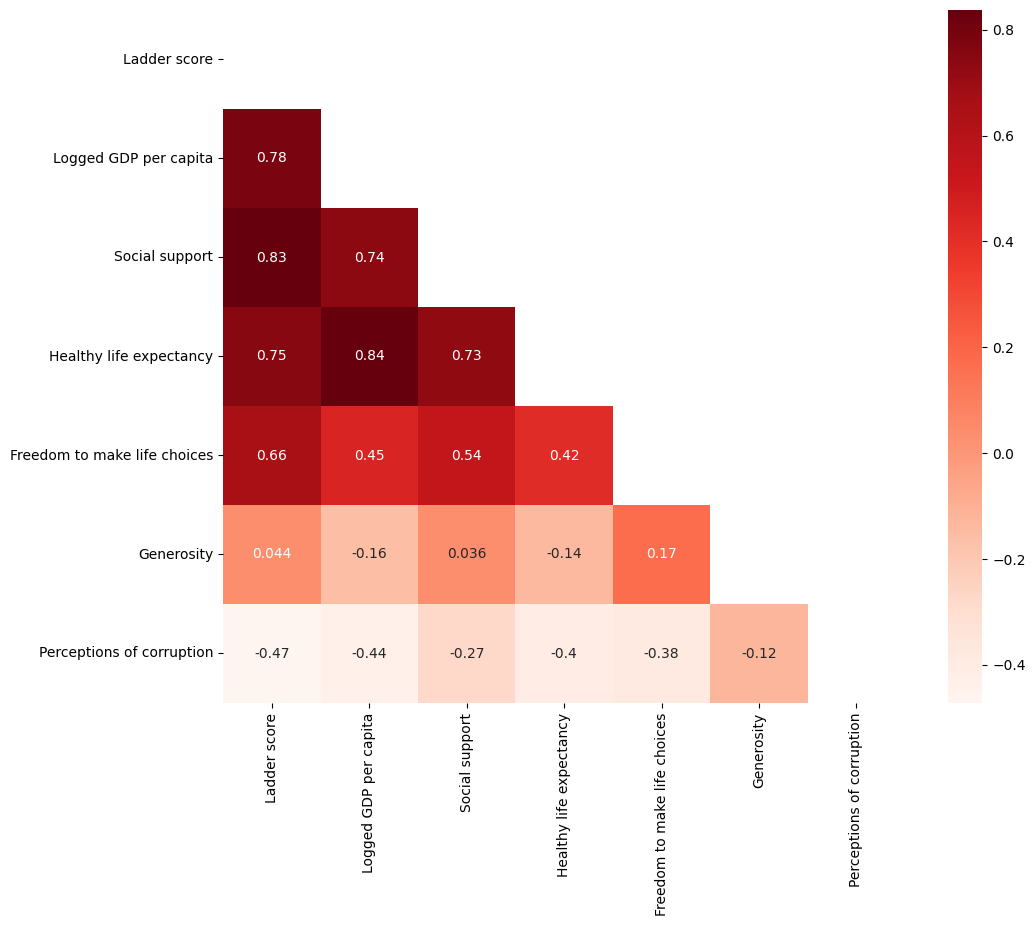

In [28]:
corr = df1_new.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corr, mask=mask, cmap="Reds",annot=True)

In [29]:
by_columns=[df1.columns[1]]+list(df1.columns[12:18])
by_columns

['Ladder score',
 'Explained by: Log GDP per capita',
 'Explained by: Social support',
 'Explained by: Healthy life expectancy',
 'Explained by: Freedom to make life choices',
 'Explained by: Generosity',
 'Explained by: Perceptions of corruption']

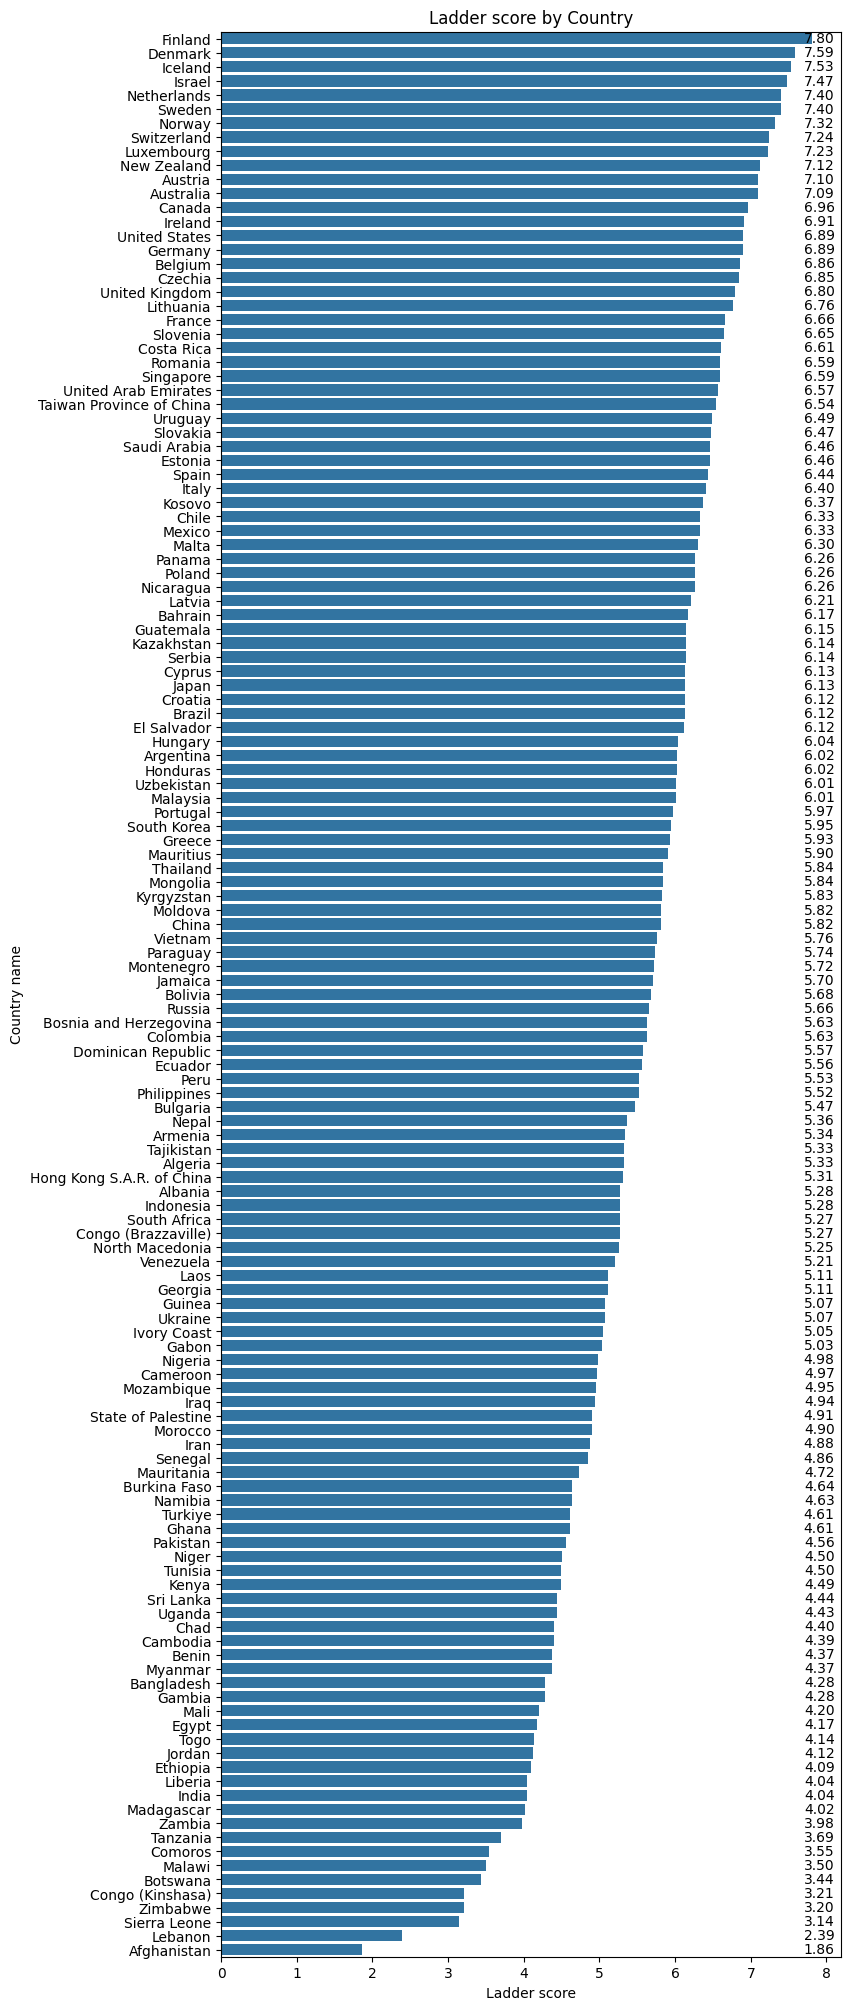

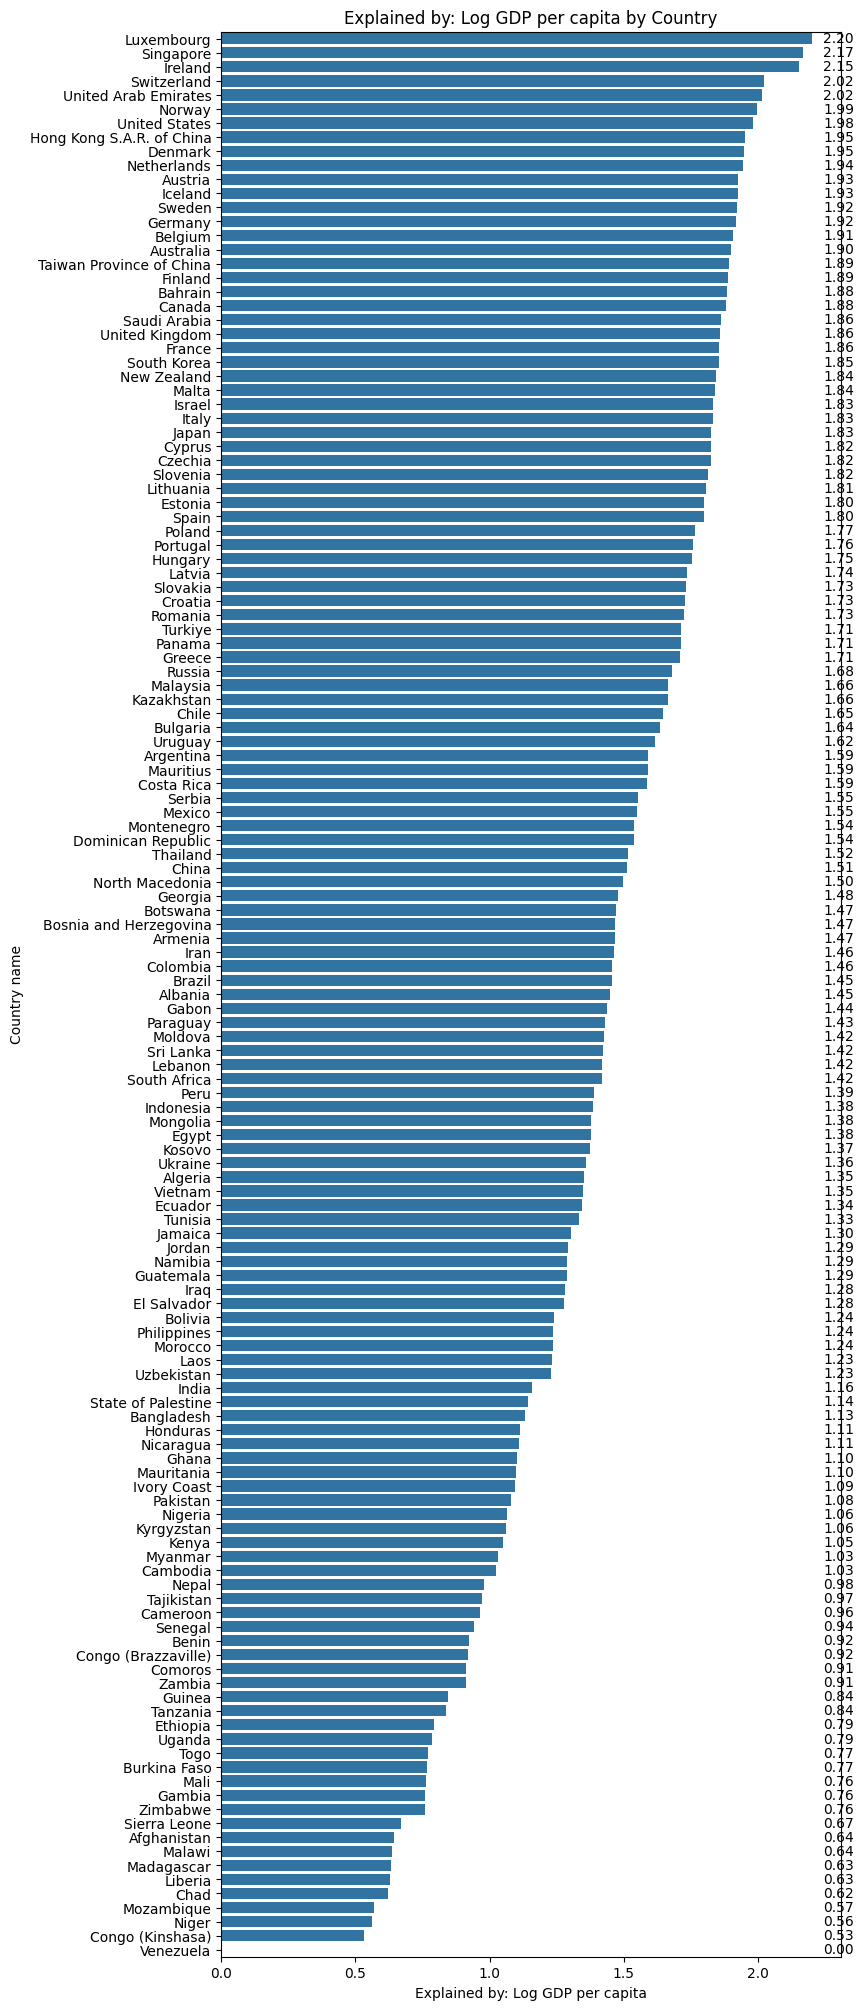

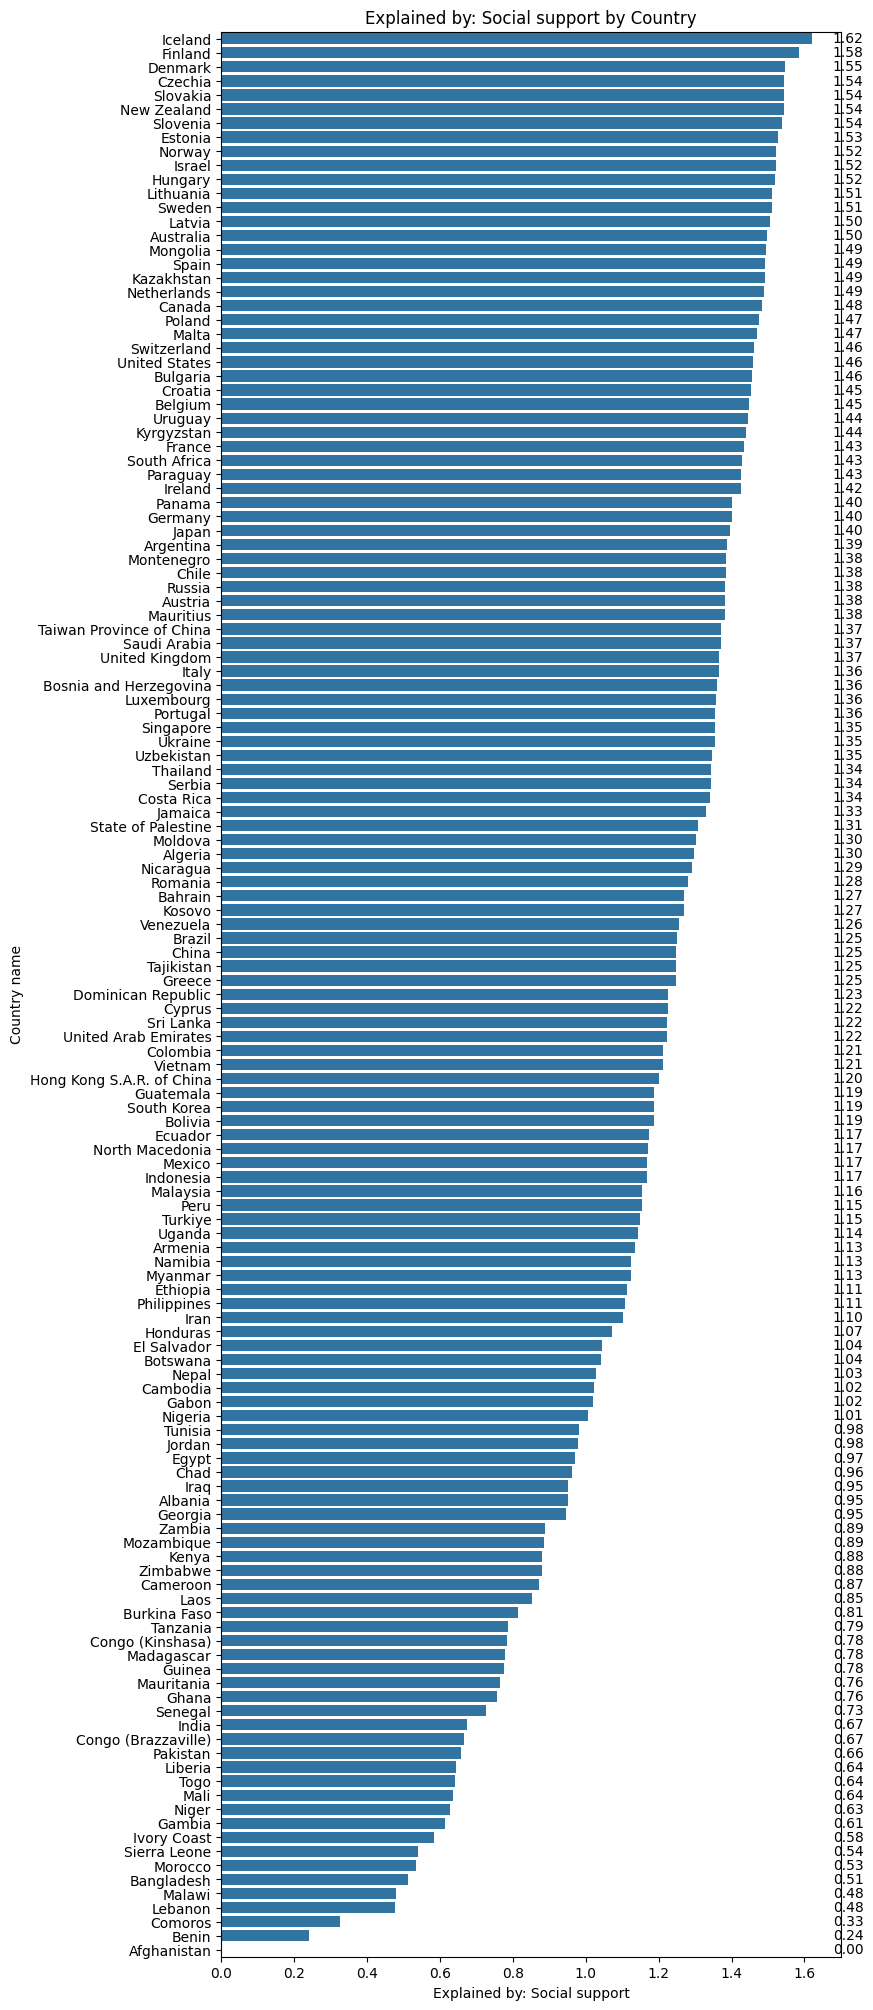

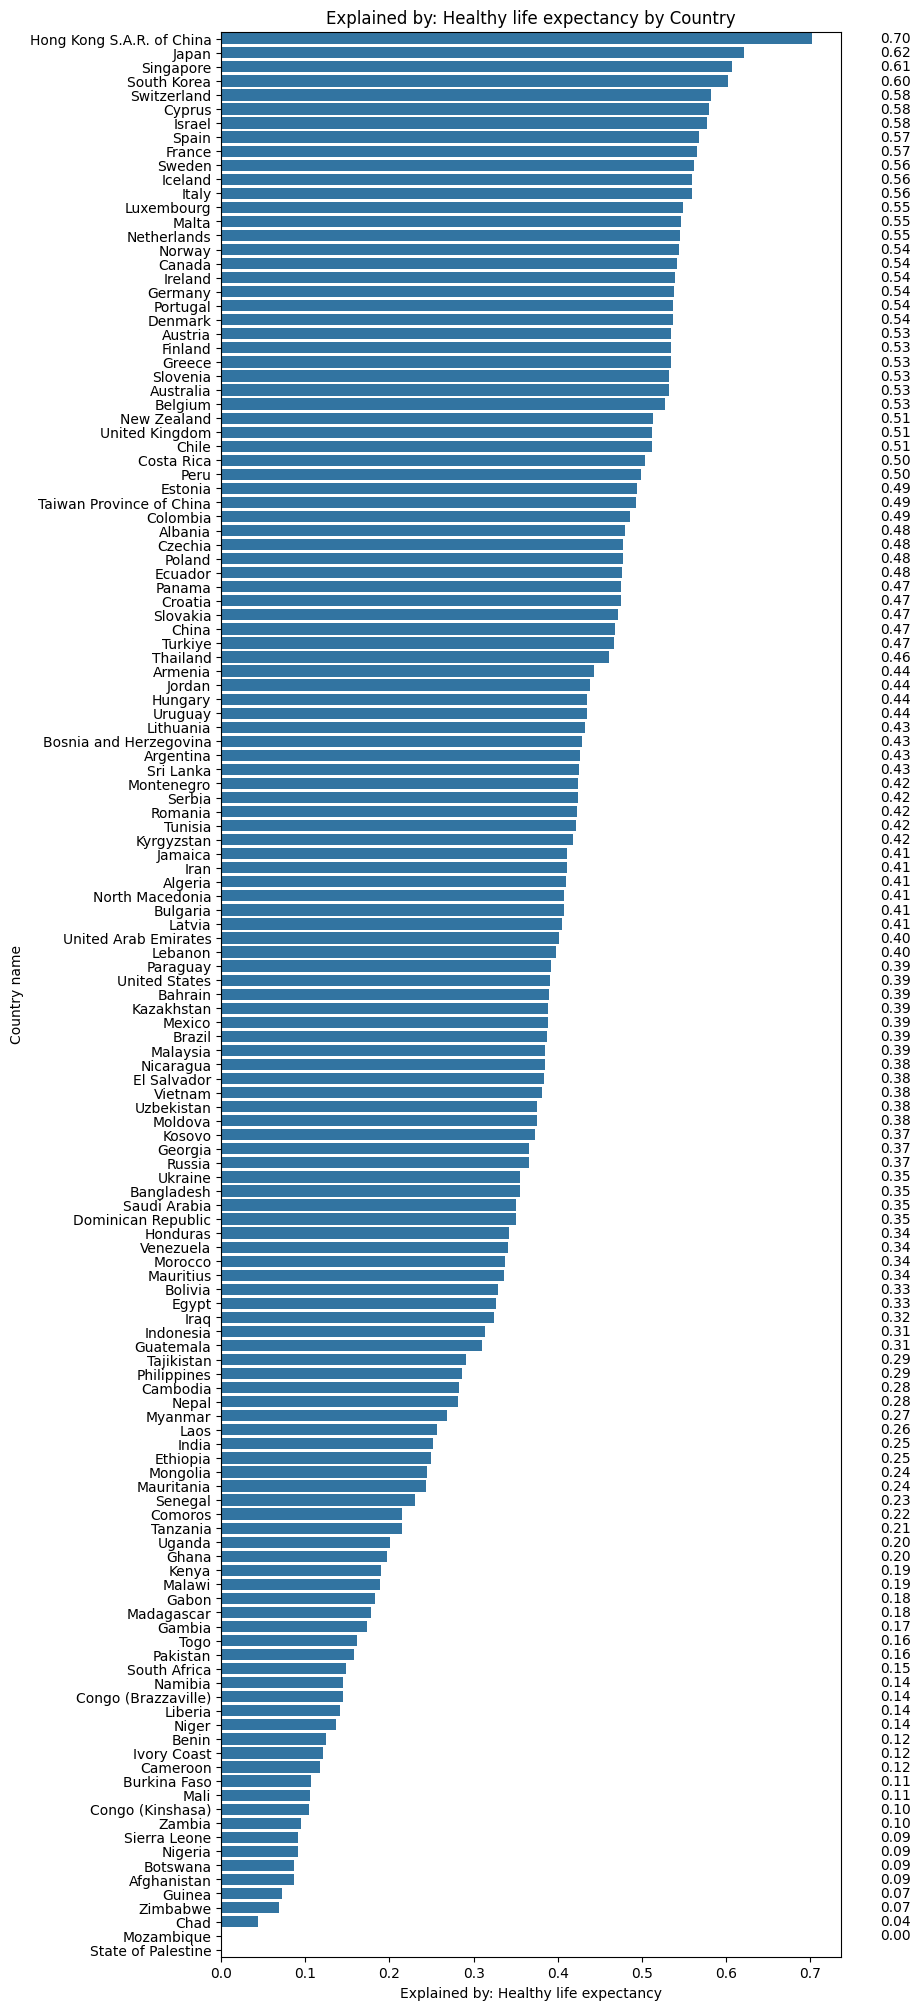

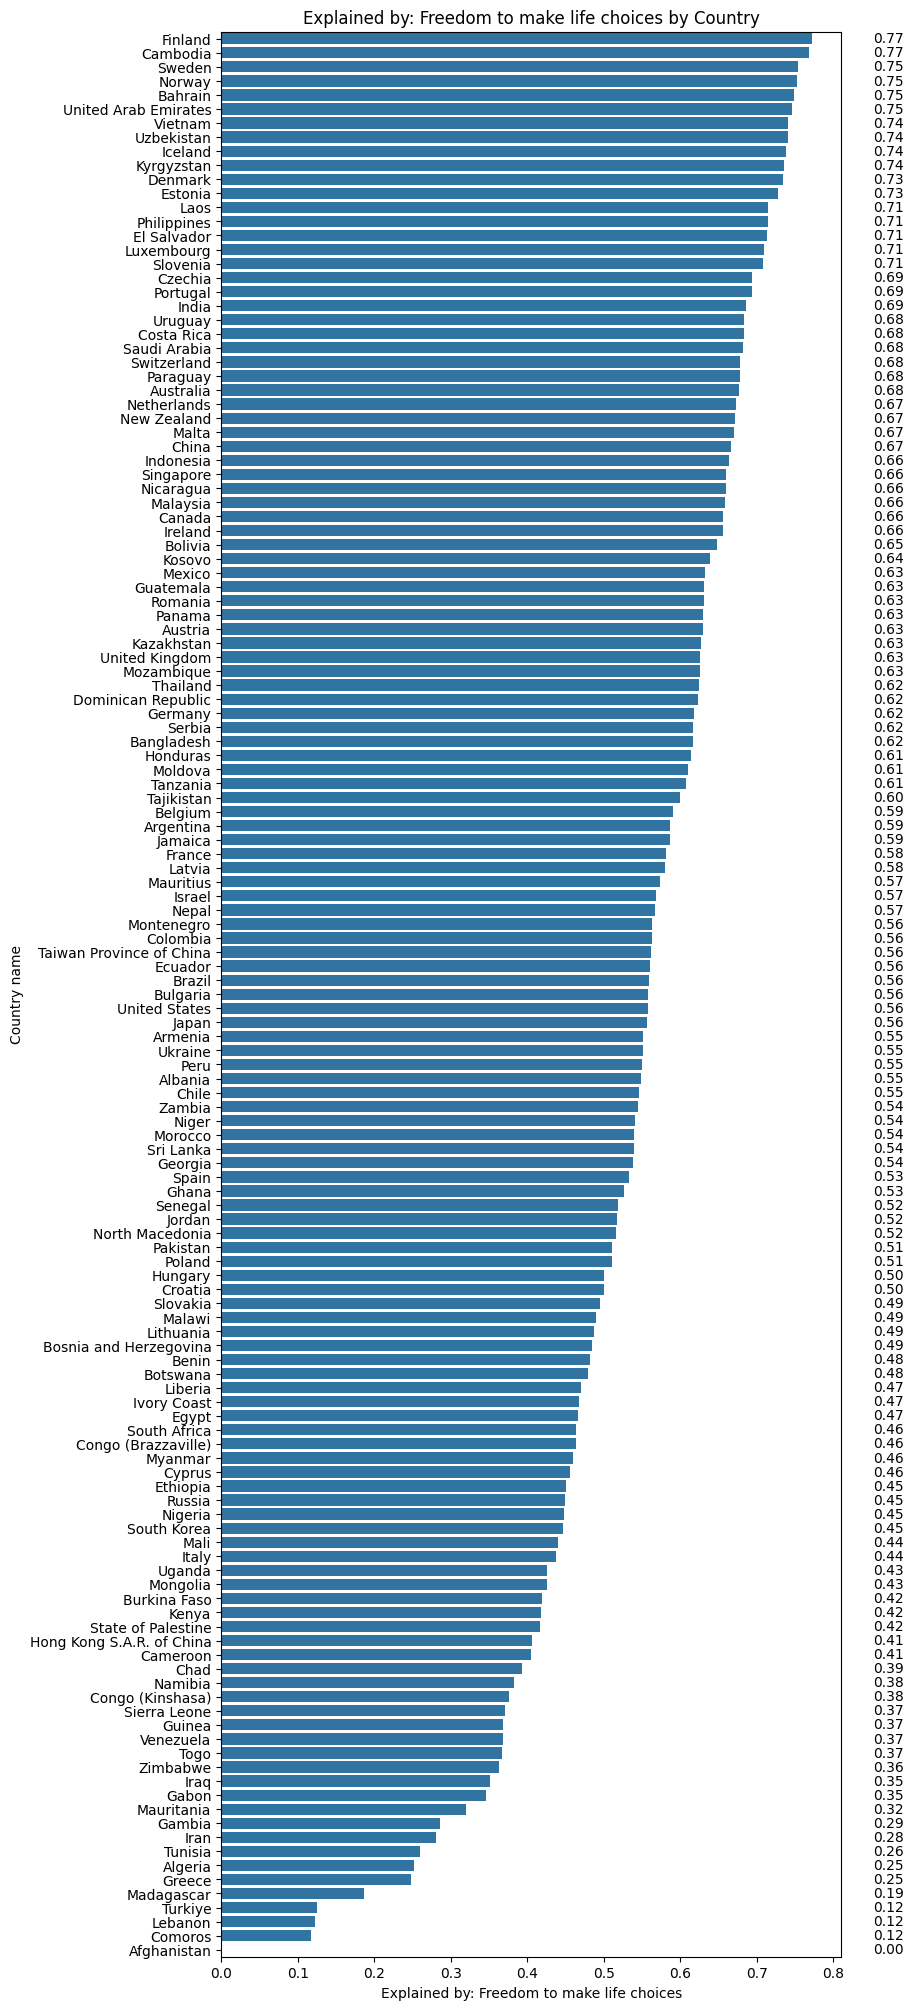

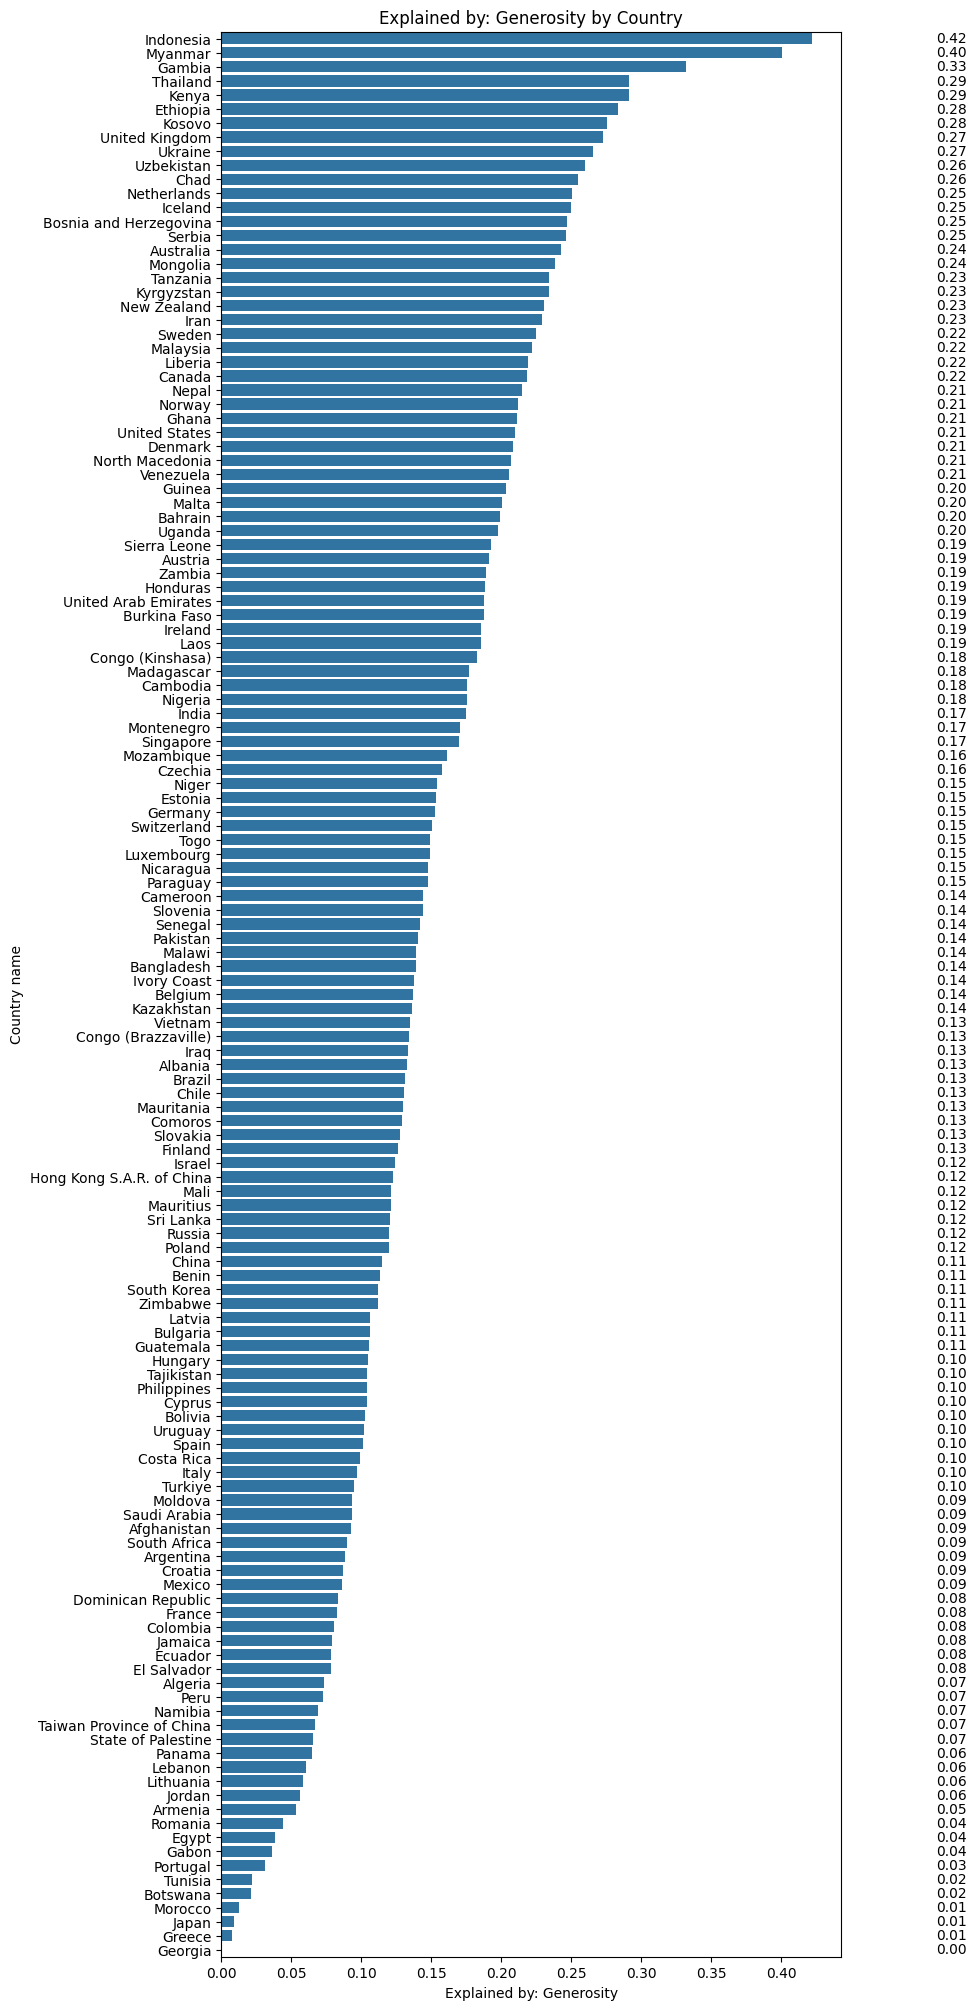

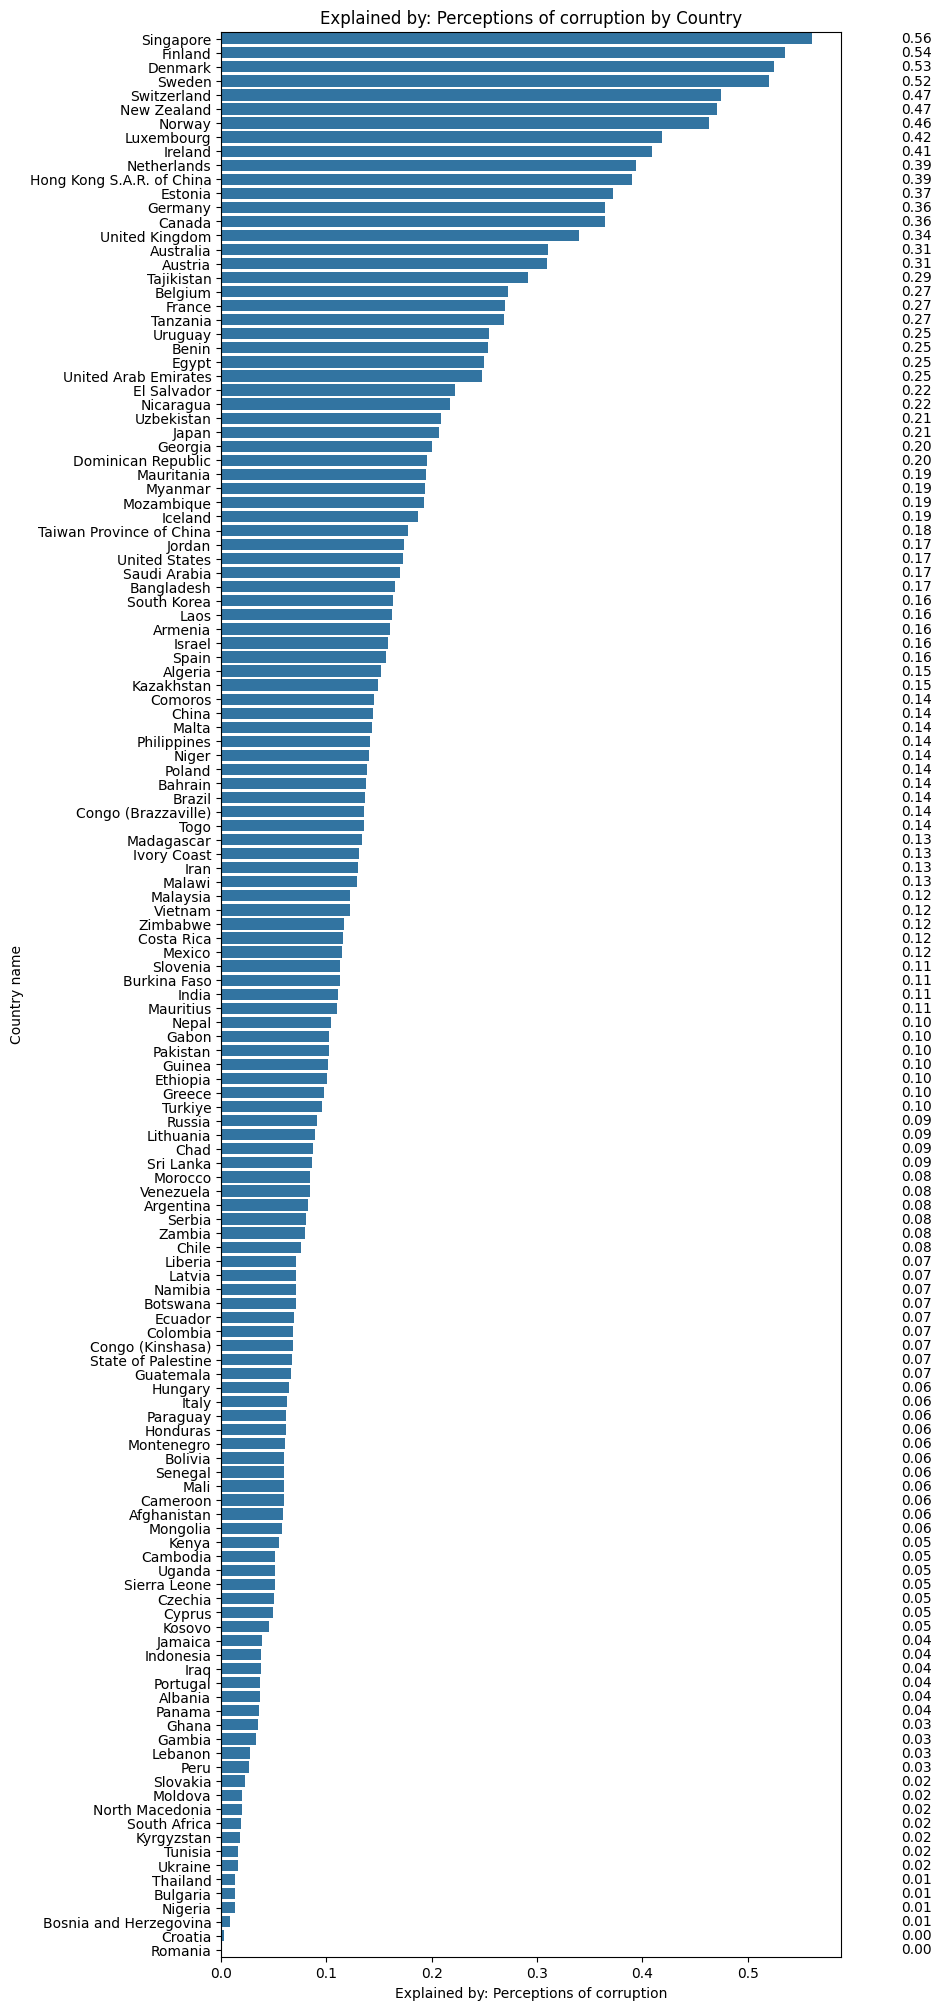

In [30]:
for i in by_columns:
    fig,ax= plt.subplots(figsize=(8,25))
    barplot = sns.barplot(x=i, y='Country name', data=df1.sort_values(by=i, ascending=False), ax=ax)
    ax.set_title(f'{i} by Country')
    max=barplot.patches[0].get_width()
    for p in barplot.patches:
        width = p.get_width()
        ax.text(max+0.1,
                p.get_y() + p.get_height() / 2, 
                '{:1.2f}'.format(width),
                ha = 'center',
                va = 'center')
